In [1]:
import sys
import numpy as np
sys.path.append("../src/")
from smearing_matrix import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-08sldqce because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Welcome to JupyROOT 6.22/06


In [2]:
#######################################################################
# Declare ROOT files for the Analysis
#######################################################################
root_files = ["../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_0.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_1.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_2.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_3.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_4.root"]

In [3]:
#######################################################################
# 1d Rectangular Binning
#######################################################################

rect_bin_factory = RectBinFactory()
rect_bin_factory.make_bins("Mh",np.linspace(0.2,2,50))

In [4]:
#######################################################################
# Load 1d Rectangular Binning into the BinManager
#######################################################################

bin_manager = BinManager()
bin_manager.load_factory(rect_bin_factory)

In [5]:
#######################################################################
# Create and run smearing matrix
#######################################################################

smearing_matrix = SmearingMatrix(root_files, bin_manager)

smearing_matrix.run()

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 17.84it/s]


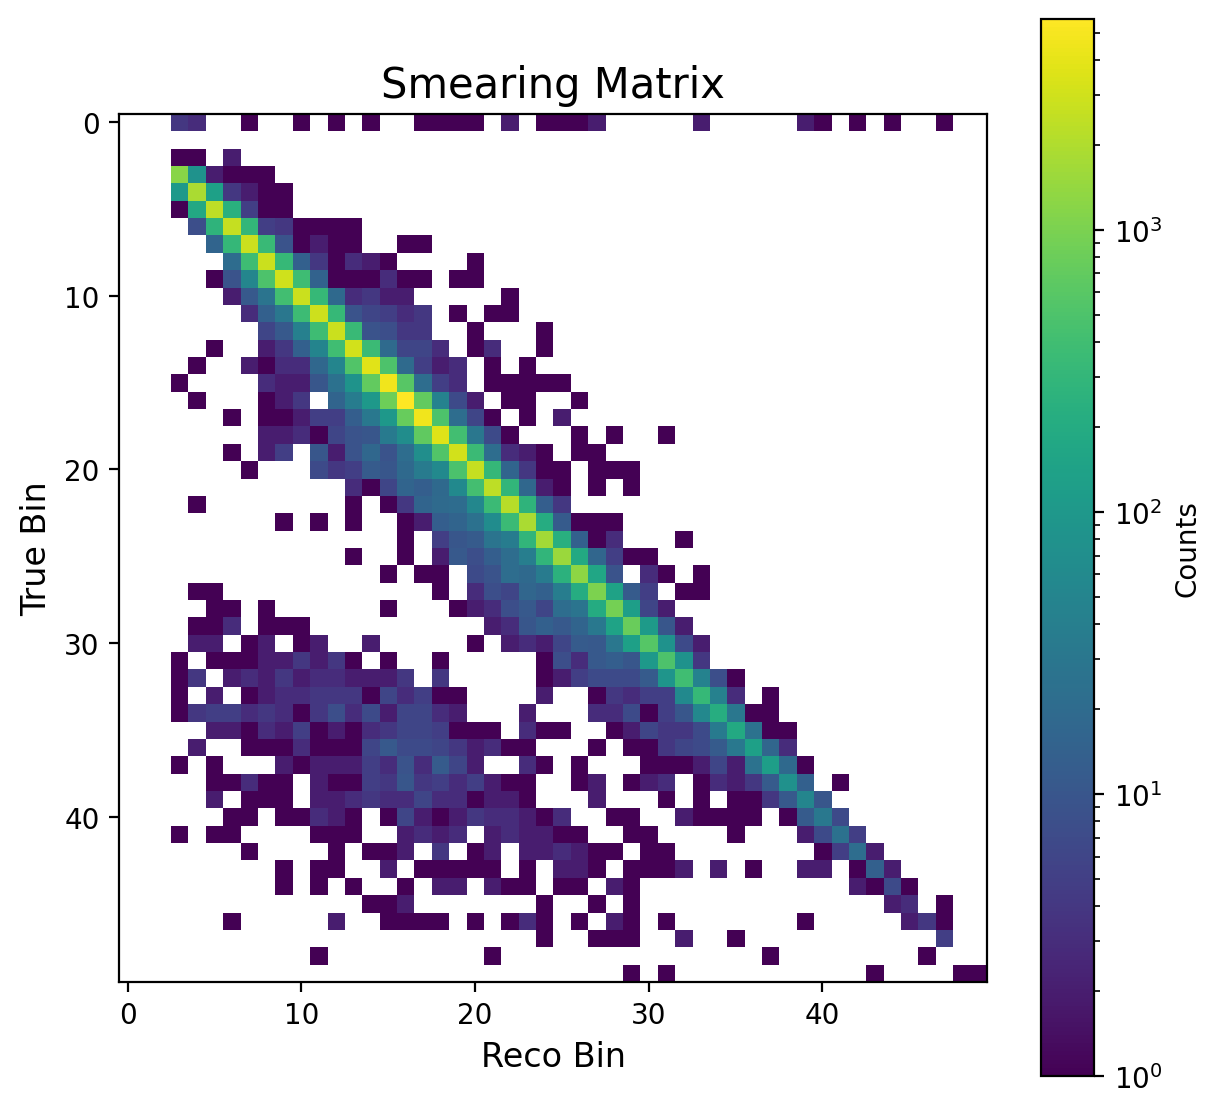

In [6]:
smearing_matrix.draw_smearing_matrix(do_log_scale=True,
                                     show_overflow=True)

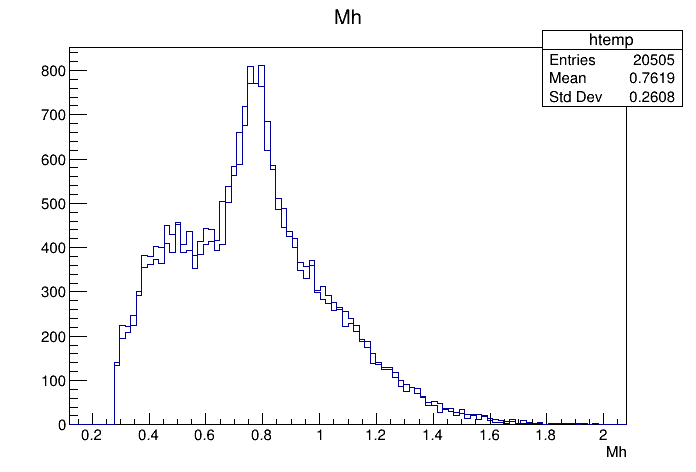

In [8]:
f = ROOT.TFile("../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_0.root")
t = f.Get("dihadron_cuts")
c=ROOT.TCanvas()
t.Draw("Mh","")
t.Draw("trueMh","","same")
c.Draw()

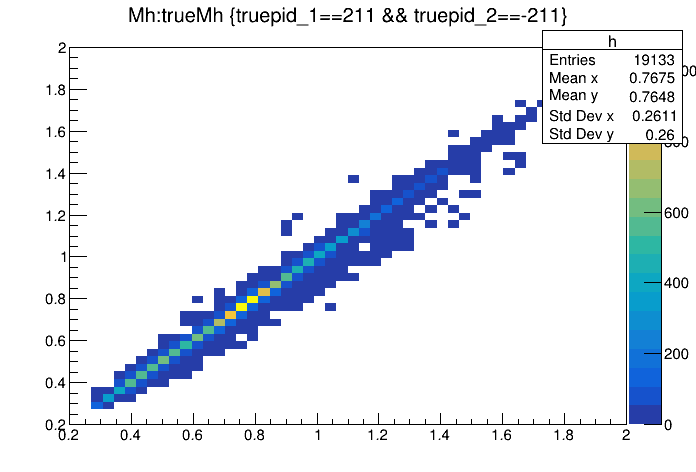

In [13]:
c=ROOT.TCanvas()
t.Draw("Mh:trueMh>>h(50,0.2,2,50,0.2,2)","truepid_1==211 && truepid_2==-211","colz")
c.Draw()

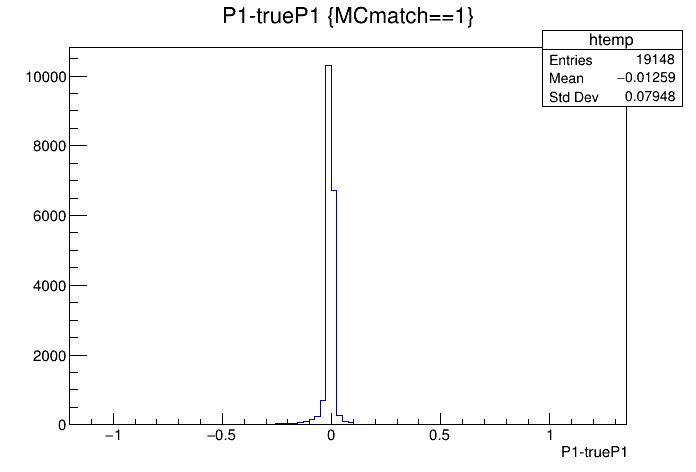

In [34]:
c=ROOT.TCanvas()
t.Draw("P1-trueP1","MCmatch==1","colz")
c.Draw()

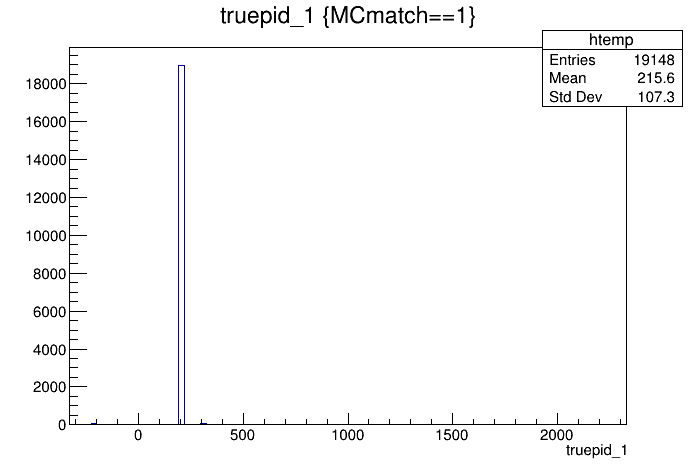

In [10]:
c=ROOT.TCanvas()
t.Draw("truepid_1","MCmatch==1","")
c.Draw()